In [1]:


import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [4]:
normal_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal"
stroke_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke"

In [5]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [6]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))

Images in Normal Data: 1551
Images in Stroke Data: 950


In [7]:
normal_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal"
stroke_path = "C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
    
for img_file in stroke_folder:
    image = Image.open("C:/Users/DELL/Desktop/brain stroke/archive (4)/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [8]:
len(data)

2501

In [9]:
data[0].shape

(224, 224, 3)

In [10]:
data[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [11]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [12]:
Target_label = normal_label + stroke_label

In [13]:
len(Target_label)

2501

In [14]:
x = np.array(data)
y = np.array(Target_label)

In [15]:
x[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [6, 6, 6],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 3, 3],
        [2, 2, 2],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [16]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


In [18]:
x_train = np.array(x_train) / 255

In [19]:

x_train.reshape(-1, 224, 224, 1)
y_train = np.array(y_train)

In [20]:
x_test=np.array(x_test)/255


In [21]:
x_test.reshape(-1, 224, 224, 1)
y_test = np.array(y_test)

In [22]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (2250, 224, 224, 3)
y_train: (2250,)
x_test: (251, 224, 224, 3)
y_test: (251,)


In [23]:
x_train = np.array(x_train).reshape(2250,1,224,224, 3)


In [24]:
x_test = np.array(x_test).reshape(251,1,224,224, 3)

In [25]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (2250, 1, 224, 224, 3)
y_train: (2250,)
x_test: (251, 1, 224, 224, 3)
y_test: (251,)


In [26]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LSTM

In [27]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu'),input_shape=(1,224,224,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(Conv2D(32,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(128,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(56,(3,3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

#model_mix_shoulder.add(TimeDistributed(Conv2D(256,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))


model.add(TimeDistributed(Flatten()))

#RNN
model.add(LSTM(100,return_sequences=False))

model.add(Dense(2,activation='softmax'))
#model.add(activation('sigmoid'))

#model.summary()

In [28]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
history = model.fit(x_train,y_train,batch_size=32,
         epochs=4, validation_data=(x_test,y_test))

Epoch 1/4
71/71 [==============================] - 160s 2s/step - loss: 0.5386 - accuracy: 0.7178 - val_loss: 0.2999 - val_accuracy: 0.8964
Epoch 2/4
71/71 [==============================] - 114s 2s/step - loss: 0.1306 - accuracy: 0.9458 - val_loss: 0.1446 - val_accuracy: 0.9363
Epoch 3/4
71/71 [==============================] - 115s 2s/step - loss: 0.0423 - accuracy: 0.9844 - val_loss: 0.1539 - val_accuracy: 0.9402
Epoch 4/4
71/71 [==============================] - 113s 2s/step - loss: 0.0187 - accuracy: 0.9951 - val_loss: 0.1406 - val_accuracy: 0.9522


In [34]:
model.save('strokes.h5')

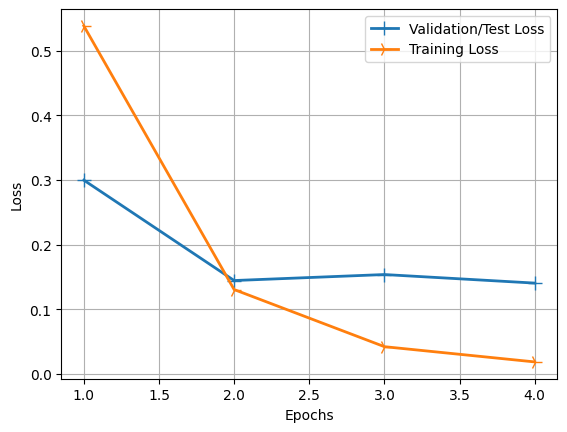

In [35]:


history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

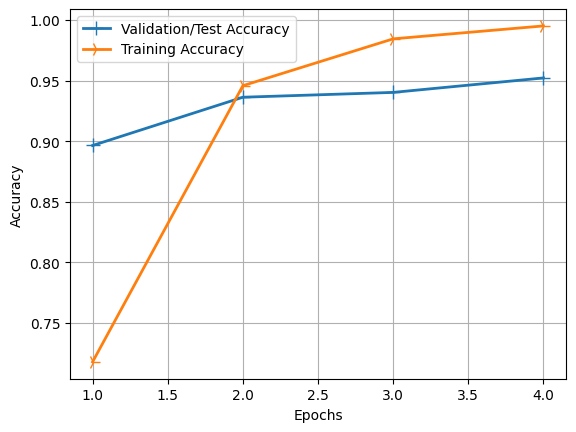

In [36]:
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
loss, acc = model.evaluate(x_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 [==============================] - 3s 356ms/step - loss: 0.1406 - accuracy: 0.9522
Loss on Test Data: 0.14063818752765656
Accuracy on Test Data: 0.9521912336349487
71/71 [==============================] - 41s 336ms/step - loss: 0.0089 - accuracy: 0.9978
Loss on Train Data: 0.00891716219484806
Accuracy on Train Data: 0.9977777600288391


In [38]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Normal','Stroke']))

8/8 [==============================] - 10s 324ms/step
              precision    recall  f1-score   support

      Normal       0.96      0.97      0.96       157
      Stroke       0.95      0.93      0.94        94

    accuracy                           0.95       251
   macro avg       0.95      0.95      0.95       251
weighted avg       0.95      0.95      0.95       251



In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=y_test, y_pred=pred)

In [42]:
cm_plot_labels = ['Normal','Stroke']

Confusion matrix, without normalization
[[152   5]
 [  7  87]]


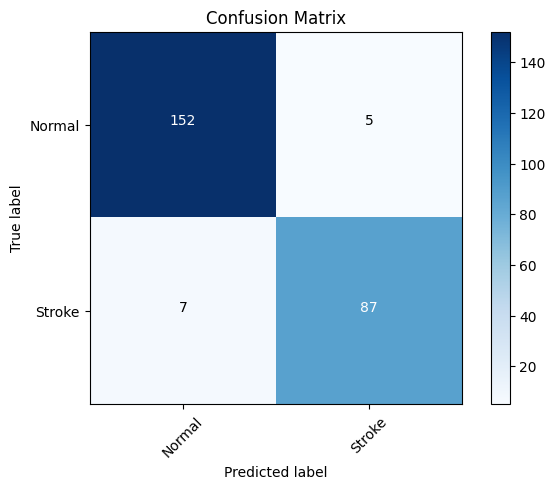

In [43]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
 

In [44]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,pred) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(y_test,pred,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test,pred, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(y_test,pred, average='micro')
print('F-Measure: %.3f' % score)

Accuracy: 0.952
Precision: 0.946
Recall: 0.952
F-Measure: 0.952
